In [249]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [371]:
#1 Defination of convergence is the difference between two rounds variable points<=10
X = pd.read_csv("cdata.csv")
c=np.array(X.sample(n=4),dtype = np.float32) #centroid
#print(c)
a = X['x'].values
b = X['y'].values
X = np.array(list(zip(a, b)))
#plt.scatter(a, b , c='black', s=7)

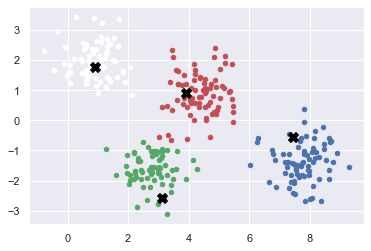

In [372]:
K=4
SSE=0
m = X.shape[0]#m=共幾組資料
#print(m)
idx = np.zeros(m)#設定m組為0的arr
#上色 把每個點到四個centroid的距離算出 然後再取最小的
for i in range(m):
    temp = np.zeros(K)
    for j in range(K):
        temp[j] = np.sum((X[i,:] - c[j,:]) ** 2) 
        #print(temp ,np.argmin(temp))
        idx[i] = np.argmin(temp)
        SSE+=min(temp)
#print('SSE=',SSE)
colors = ['r', 'g', 'b','w']
fig, ax = plt.subplots()
#fig2, ax2 = plt.subplots()
NewC = []
IndiNum=[]
for i in range(K):
    points = np.array([X[j] for j in range(len(X)) if idx[j] == i])
    #print('New:',len(points))
    ax.scatter(x=points[:, 0], y=points[:, 1], c=colors[i],s=20)
    #黃點是下次的新中心
    #ax.scatter(sum(points[:, 0])/len(points[:, 0]),sum(points[:, 1])/len(points[:, 1]) , marker='X', s=100, c='yellow')
    NewC.append([sum(points[:, 0])/len(points[:, 0]),sum(points[:, 1])/len(points[:, 1])])
    IndiNum.append(len(points))
#找新的中心點 NewC
NewC=np.array(NewC)
#IndiNum=np.array(IndiNum)
#print(IndiNum)
ax.scatter(c[:, 0], c[:, 1], marker='X', s=100, c='black')

In [373]:
#定義convengence的算法
def diff(Num1,Num2,K):
    sum=0
    for i in range (0,K):
        sum+=abs(Num1[i]-Num2[i])
    return int(sum)

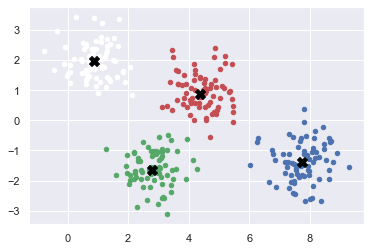

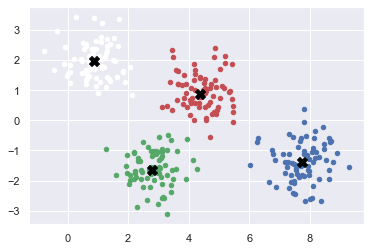

In [374]:
#將上面過程製成函數 方便重複執行直到convengence
def plot(c,K,X,m):
    idx = np.zeros(m)
    SSE=0
    for i in range(m):
        temp = np.zeros(K)
        for j in range(K):
            temp[j] = np.sum((X[i,:] - c[j,:]) ** 2) 
            idx[i] = np.argmin(temp)
            SSE+=min(temp)
    #print('SSE=',SSE)
    colors = ['r', 'g', 'b','w']
    fig, ax = plt.subplots()
    NewC2 = []
    IndiNum=[]
    for i in range(K):
        points = np.array([X[j] for j in range(len(X)) if idx[j] == i])
        ax.scatter(x=points[:, 0], y=points[:, 1], c=colors[i],s=20)
        #ax.scatter(sum(points[:, 0])/len(points[:, 0]),sum(points[:, 1])/len(points[:, 1]) , marker='X', s=100, c='yellow')
        NewC2.append([sum(points[:, 0])/len(points[:, 0]),sum(points[:, 1])/len(points[:, 1])])
        IndiNum.append(len(points))
    #找新的中心點 NewC
    NewC2=np.array(NewC2)
    #print(NewC)
    ax.scatter(c[:, 0], c[:, 1], marker='X', s=100, c='black')
    #print(IndiNum)
    #return 新的中心點
    return (NewC2,IndiNum,SSE)
#diff(Gap,IndiNum)
Gap=plot(NewC,4,X,m)[1]
NewC=plot(NewC,4,X,m)[0]
#無限迴圈直到條件達成
while(diff(Gap,IndiNum,4)>10):
    NewC=plot(NewC,4,X,m)[0]
    IndiNum=Gap
    Gap=plot(NewC,4,X,m)[1]

[[1190.92019962    2.        ]
 [ 547.0448533     3.        ]
 [ 216.12138197    4.        ]
 [ 188.83034797    5.        ]
 [ 177.40640185    6.        ]
 [ 175.65857576    7.        ]
 [ 147.47158011    8.        ]
 [ 135.43795578    9.        ]
 [ 130.84891159   10.        ]
 [ 124.50124927   11.        ]
 [ 118.80926778   12.        ]
 [ 124.11775621   13.        ]
 [  90.97711921   14.        ]
 [  89.28140193   15.        ]
 [ 101.0937749    16.        ]
 [  80.3225747    17.        ]
 [  63.58098693   18.        ]
 [  64.80892611   19.        ]
 [  65.14819853   20.        ]
 [  72.05255482   21.        ]
 [  61.86014604   22.        ]
 [  61.50708055   23.        ]
 [  67.44010929   24.        ]
 [  59.62843402   25.        ]
 [  44.72536516   26.        ]
 [  44.06058013   27.        ]
 [  42.61167597   28.        ]
 [  44.10854984   29.        ]
 [  47.09992576   30.        ]
 [  45.67494704   31.        ]
 [  39.16900977   32.        ]
 [  38.00001082   33.        ]
 [  31.6

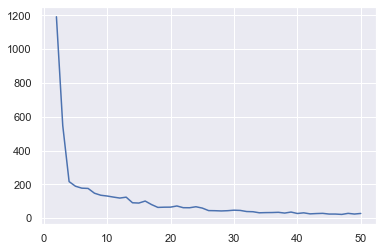

In [367]:
#2
#和plot一樣 差別只在將繪圖的函數拿掉 因為只須找出SSE即可
def plot2(c,K,X,m):
    idx = np.zeros(m)
    SSE=0
    for i in range(m):
        temp = np.zeros(K)
        for j in range(K):
            temp[j] = np.sum((X[i,:] - c[j,:]) ** 2) 
            idx[i] = np.argmin(temp)
            SSE+=min(temp)
    #print('SSE=',SSE)
    colors = ['r', 'g', 'b','w']
    #fig, ax = plt.subplots()
    NewC2 = []
    IndiNum=[]
    for i in range(K):
        points = np.array([X[j] for j in range(len(X)) if idx[j] == i])
        NewC2.append([sum(points[:, 0])/len(points[:, 0]),sum(points[:, 1])/len(points[:, 1])])
        IndiNum.append(len(points))
    #找新的中心點 NewC
    NewC2=np.array(NewC2)
    #print(NewC)
    #print(IndiNum)
    #return 新的中心點
    return (NewC2,IndiNum,SSE)
#定義一套完整的流程
def all(K):
    X = pd.read_csv("cdata.csv")
    c=np.array(X.sample(n=K),dtype = np.float32) #centroid
    a = X['x'].values
    b = X['y'].values
    X = np.array(list(zip(a, b)))
    SSE=0
    m = X.shape[0]#m=共幾組資料
    idx = np.zeros(m)#設定m組為0的arr
    for i in range(m):
        temp = np.zeros(K)
        for j in range(K):
            temp[j] = np.sum((X[i,:] - c[j,:]) ** 2) 
            #print(temp ,np.argmin(temp))
            idx[i] = np.argmin(temp)
            SSE+=min(temp)
    #print('SSE=',SSE)
    colors = ['r', 'g', 'b','w']
    #fig, ax = plt.subplots()
    NewC = []
    IndiNum=[]
    for i in range(K):
        points = np.array([X[j] for j in range(len(X)) if idx[j] == i])
        NewC.append([sum(points[:, 0])/len(points[:, 0]),sum(points[:, 1])/len(points[:, 1])])
        IndiNum.append(len(points))
    NewC=np.array(NewC)
    #print(IndiNum)
    Gap=plot2(NewC,K,X,m)[1]
    NewC=plot2(NewC,K,X,m)[0]
    while(diff(Gap,IndiNum,K)>10):
        NewC=plot2(NewC,K,X,m)[0]
        IndiNum=Gap
        Gap=plot2(NewC,K,X,m)[1]
    return plot2(NewC,K,X,m)[2]
#all(5)
ChartSSE=[]
for i in range(2,51):
    ChartSSE.append([all(i),i])
ChartSSE=np.array(ChartSSE)
print(ChartSSE)
plt.plot(ChartSSE[:,1],ChartSSE[:,0])

<BarContainer object of 10 artists>

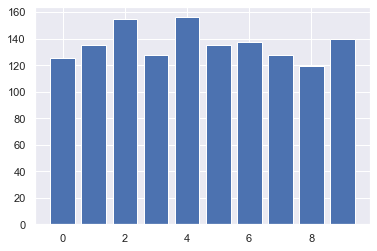

In [370]:
#3
#大多呈2的函數 再繪出圖即可
TenSSE=[]
for i in range(10):
    TenSSE.append([all(10),i])
TenSSE=np.array(TenSSE)
plt.bar(TenSSE[:,1],TenSSE[:,0])